# Emergency 911 Calls Project

Import Libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
df = pd.read_csv('911.csv') # Read data as df dataframe

In [156]:
df.info()    # Check data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [157]:
df.head(3)   # Check data head

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


#### Top 5 zipcodes for 911 calls

In [158]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Top 5 townships (twp) for 911 calls

In [159]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Number of unique title codes 

In [160]:
df['title'].nunique()

110

#### Create new column

In [161]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0]) #creating a new column with the apply method

In [162]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### Most common Reason for a 911 call 

In [164]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### Countplot of 911 calls by Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

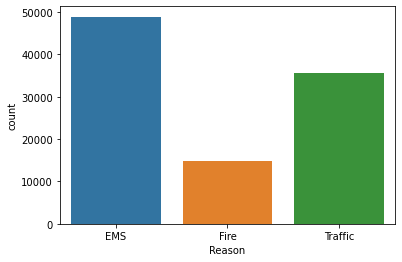

In [165]:
sns.countplot(x='Reason',data=df)

In [166]:
type(df['timeStamp'].iloc[0]) #data type of the time stamp column

str

#### Convert timestamp string to DateTime objects

In [167]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])  #convert the string to DateTime objects

In [168]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour) # Create Hour column from the timestamp column
df['Month'] = df['timeStamp'].apply(lambda x: x.month) # Create Month column from the timestamp column

In [169]:
# Create Day of week column from the timestamp column
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.weekday()).map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

Countplot of the Day of Week

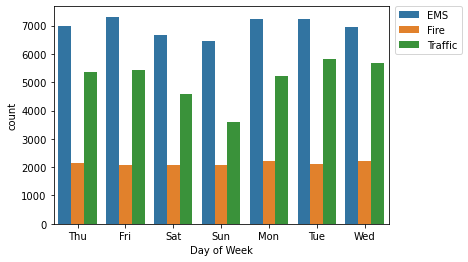

In [170]:
sns.countplot(x='Day of Week',data=df,hue='Reason') # Countplot of the Day of Week 
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.); # Relocate legend 

Countplot of the Month

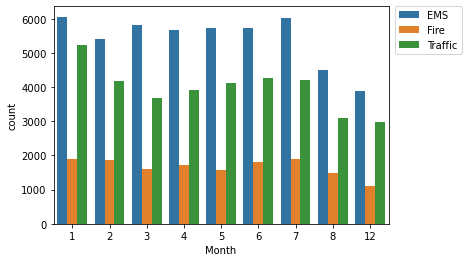

In [171]:
sns.countplot(x='Month',data=df,hue='Reason') # Countplot of the Month
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.) # Relocate legend

#### Group by month

In [172]:
byMonth = df.groupby(by='Month').count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

#### Plot indicating count of calls per month

<AxesSubplot:xlabel='Month'>

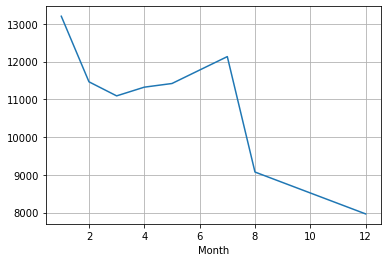

In [174]:
byMonth['twp'].plot(grid=True)

#### linear fit on the number of calls per month

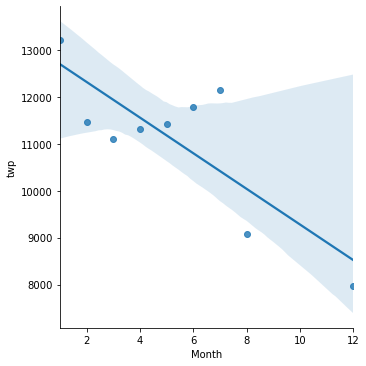

In [176]:
byMonth = byMonth.reset_index()
sns.lmplot(data=byMonth,x='Month',y='twp')

#### Create a Date column containing the date from the timeStamp column.

In [178]:
df['Date'] = df.timeStamp.apply(lambda x: x.date())

#### Plot of counts of 911 calls.

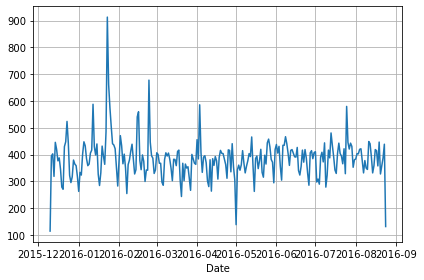

In [179]:
df.groupby(by='Date').count()['twp'].plot()
plt.tight_layout()
plt.grid()

#### plot of traffic as a reason for 911 calls

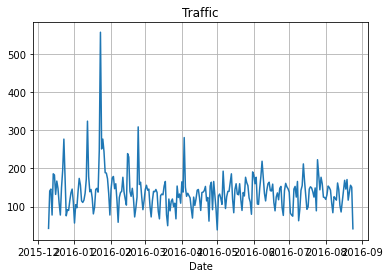

In [181]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.grid()

#### plot of fire as a reason for 911 calls

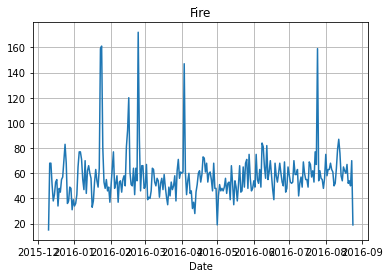

In [182]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.grid()

#### plot of EMS as a reason for 911 calls

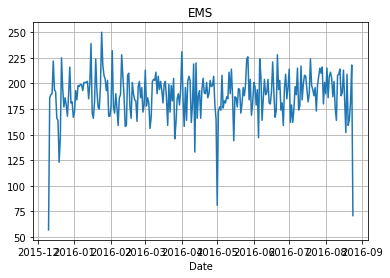

In [183]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.grid()

### Heatmaps

In [185]:
dayHour = df.groupby(['Day of Week','Hour']).count().unstack(1)['Reason']
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

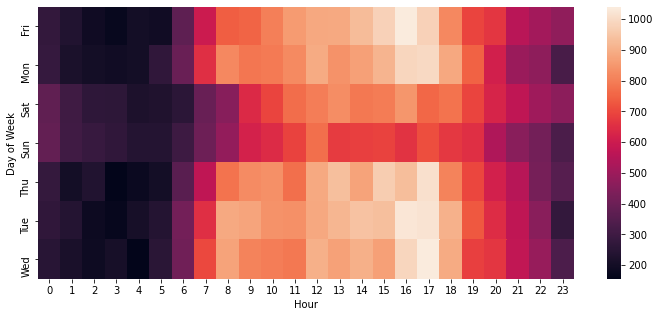

In [186]:
plt.figure(figsize=(12,5))
sns.heatmap(dayHour)

<Figure size 864x360 with 0 Axes>

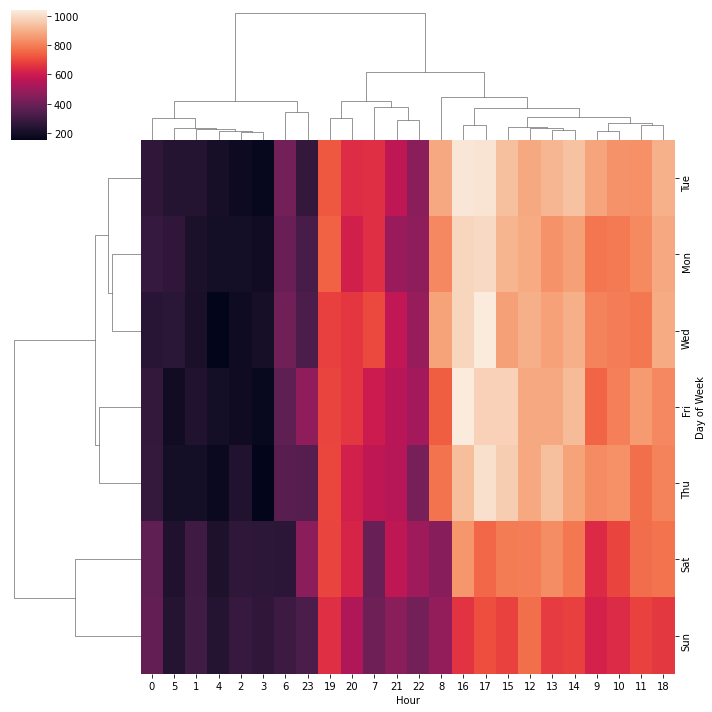

In [187]:
plt.figure(figsize=(12,5))
sns.clustermap(dayHour)
plt.show()

In [188]:
dayMonth = df.groupby(by=['Day of Week','Month']).count().unstack(1)['Reason']
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

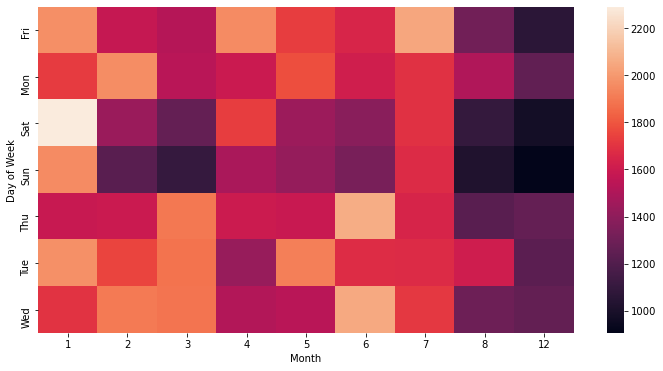

In [189]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

<Figure size 864x432 with 0 Axes>

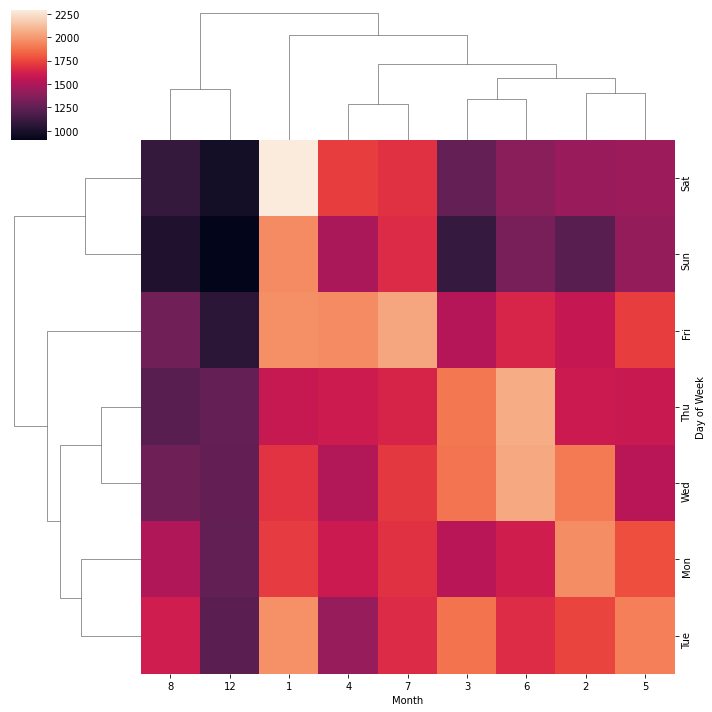

In [190]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth)